<a href="https://colab.research.google.com/github/michaeltiede/UST_ML/blob/main/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload the file
from google.colab import files
uploaded=files.upload()



In [ ]:
#Import the necessary packages
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix,auc, accuracy_score
from sklearn.metrics import classification_report

        

In [ ]:
#Import the data
csvf =csv.reader(open('Diabetes Group Project Data.csv','r'))


#Standardize the data
df = pd.read_csv(r'Diabetes Group Project Data.csv')

#Replace missing values with the column average
mean_Glucose = df['Glucose'].mean()
df = df.replace({'Glucose': {0:mean_Glucose}})

mean_BloodPressure = df['BloodPressure'].mean()
df = df.replace({'BloodPressure': {0:mean_BloodPressure}})

mean_SkinThickness = df['SkinThickness'].mean()
df = df.replace({'SkinThickness': {0:mean_SkinThickness}})

mean_Insulin = df['Insulin'].mean()
df = df.replace({'Insulin': {0:mean_Insulin}})

mean_BMI = df['BMI'].mean()
df = df.replace({'BMI': {0:mean_BMI}})

mean_Age = df['Age'].mean()
df = df.replace({'Age': {0:mean_Age}})


df['Pregnancies'] = preprocessing.scale(df['Pregnancies'])
df ['Glucose'] = preprocessing.scale(df['Glucose'])
df['BloodPressure']= preprocessing.scale(df['BloodPressure'])
df['SkinThickness'] = preprocessing.scale (df['SkinThickness'])
df['Insulin'] = preprocessing.scale (df['Insulin'])
df['BMI'] = preprocessing.scale (df['BMI'])
df['Age'] = preprocessing.scale (df['Age'])

#Add the data to the proper variables

Y = df['Outcome']

df = df.drop(['Outcome'],axis=1)

X = pd.concat([df],axis=1)


print (X.shape, Y.shape) 

df.head()



(768, 8) (768,)


In [ ]:
#Linear SVM model

alf = svm.SVC (kernel = 'linear', C=1000, probability = True)
alf.fit(X,Y)

print(alf.n_support_) #number of support vectors for this model

func = alf.predict(X)
#print(func)
g = alf.decision_function(X)
#print(g)


       

allresults = alf.predict_proba(X)

scores = classification_report(Y,func)

print(scores)

[199 198]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



In [ ]:
#RBF Models to find best model

blf = svm.SVC (kernel = 'rbf', C=0.01, gamma = 1, probability = True)
blf.fit(X,Y)

clf = svm.SVC (kernel = 'rbf', C=0.001, gamma = 1, probability = True )
clf.fit(X,Y)

dlf = svm.SVC (kernel = 'rbf', C=1.0, gamma = 1 ,probability = True )
dlf.fit(X,Y)

elf = svm.SVC (kernel = 'rbf', C=5.0, gamma = 1 , probability = True)
elf.fit(X,Y)

flf = svm.SVC (kernel = 'rbf', C=1.0, gamma = 0.005 ,probability = True )
flf.fit(X,Y)

glf = svm.SVC (kernel = 'rbf', C=1.0, gamma = 0.05, probability = True )
glf.fit(X,Y)

hlf = svm.SVC (kernel = 'rbf', C=1.0, gamma = 0.5, probability = True )
hlf.fit(X,Y)

ilf = svm.SVC (kernel = 'rbf', C=1.0, gamma = 3, probability = True )
ilf.fit(X,Y)



bfunc = blf.predict(X)
bscores = classification_report(Y,bfunc)
print(bscores)


cfunc = clf.predict(X)
cscores = classification_report(Y,cfunc)
print(cscores)

dfunc = dlf.predict(X)
dscores = classification_report(Y,dfunc)
print(dscores)

efunc = elf.predict(X)
escores = classification_report(Y,efunc)
print(escores)

ffunc = flf.predict(X)
fscores = classification_report(Y,ffunc)
print(fscores)

gfunc = glf.predict(X)
gscores = classification_report(Y,gfunc)
print(gscores)

hfunc = hlf.predict(X)
hscores = classification_report(Y,hfunc)
print(hscores)

ifunc = ilf.predict(X)
iscores = classification_report(Y,ifunc)
print(iscores)






/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       268

    accuracy                           0.65       768
   macro avg       0.33      0.50      0.39       768
weighted avg       0.42      0.65      0.51       768

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       500
           1       0.00      0.00      0.00       268

    accuracy                           0.65       768
   macro avg       0.33      0.50      0.39       768
weighted avg       0.42      0.65      0.51       768

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.96      0.89      0.92       268

    accuracy                           0.95       768
   macro avg       0.95      0.93      0.94       768
weighted avg       0.95      0.95      0.95       768

              preci

roc_auc_0:  0.8456044776119402
roc_auc_1: 0.8456044776119402 



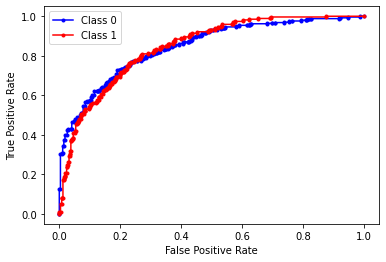

In [ ]:
fpr_0, tpr_0,_ = roc_curve(Y, allresults[:,0], pos_label=0)
roc_auc_0= roc_auc_score(Y, 1 - allresults[:,0])

fpr_1,tpr_1,_ = roc_curve(Y, allresults[:,1], pos_label=1)
roc_auc_1 = roc_auc_score(Y, allresults[:,1])

print ('roc_auc_0: ', roc_auc_0)
print ('roc_auc_1:' , roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker = '.', label= "Class 0", color ='b')
plt.plot(fpr_1, tpr_1, marker ='.', label ='Class 1', color = 'r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
#Using best RBF model

rfbest = svm.SVC (kernel = 'rbf', C=1.0, gamma = 0.8, probability = True )
rfbest.fit(X,Y)

bestfunc = rfbest.predict(X)
bestscores = classification_report(Y,bestfunc)
print(bestscores)

print ("Number of support vectors in each class for rbf model is", rfbest.n_support_)





              precision    recall  f1-score   support

           0       0.93      0.97      0.95       500
           1       0.94      0.87      0.90       268

    accuracy                           0.93       768
   macro avg       0.94      0.92      0.93       768
weighted avg       0.93      0.93      0.93       768

Number of support vectors in each class for rbf model is [335 259]


roc_auc_0:  0.9744701492537313
roc_auc_1: 0.9744701492537313 



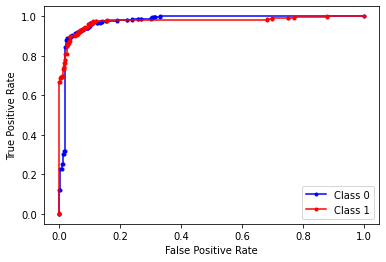

In [ ]:
# ROC curve

probab = rfbest.predict_proba(X)

fpr_0, tpr_0,_ = roc_curve(Y, probab[:,0], pos_label=0)
roc_auc_0= roc_auc_score(Y, 1 - probab[:,0])

fpr_1,tpr_1,_ = roc_curve(Y, probab[:,1], pos_label=1)
roc_auc_1 = roc_auc_score(Y, probab[:,1])

print ('roc_auc_0: ', roc_auc_0)
print ('roc_auc_1:' , roc_auc_1, '\n')

plt.plot(fpr_0, tpr_0, marker = '.', label= "Class 0", color ='b')
plt.plot(fpr_1, tpr_1, marker ='.', label ='Class 1', color = 'r')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
alf.fit(X, Y) 
print('w = ',alf.coef_)
print('b = ',alf.intercept_)
#print('Indices of support vectors = ', alf.support_)
print('Support vectors = ', alf.support_vectors_)
#print('Number of support vectors for each class = ', alf.n_support_)
#print('Coefficients of the support vector in the decision function = ', np.abs(alf.dual_coef_))



w =  [[ 0.31612282  0.94050879 -0.09802498 -0.11835852 -0.05531679  0.54269961
   0.67759449  0.09255996]]
b =  [-0.99472769]
Support vectors =  [[ 1.82781311 -0.21967262 -0.260103   ...  0.41467589  0.134
  -0.36084741]
 [ 0.04601433 -0.38405874  1.63075046 ...  0.74942117  0.191
  -0.27575966]
 [ 1.82781311  0.56938074  0.63967354 ... -0.77876382  1.441
   2.02160968]
 ...
 [-0.84488505  0.20773128  1.30039148 ...  0.5893256   1.057
   0.31985461]
 [-1.14185152  0.04334517 -0.0210444  ...  0.56021731  0.258
   1.59617091]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954  0.349
   1.17073215]]


In [ ]:
def plot_svc_decision_function(alf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = alf.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(alf.support_vectors_[:, 0],
                   alf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [1]:
# from sklearn.svm import SVC
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets

# alf = svm.SVC (kernel = 'linear', C=1000, probability = True)
# alf.fit(X,Y)

# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# model = svm.SVC(kernel='linear', C=1000, probability = True)
# clf = model.fit(X, Y)

# fig, ax = plt.subplots()
# # title for the plots
# title = ('Decision surface of linear SVC ')
# # Set-up grid for plotting.


# #trying to convert df into an array to graph
# X = df.iloc[:,:-1].values
# Y = df.iloc[:,-1].values


# X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel('y label here')
# ax.set_xlabel('x label here')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# ax.legend()
# plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])